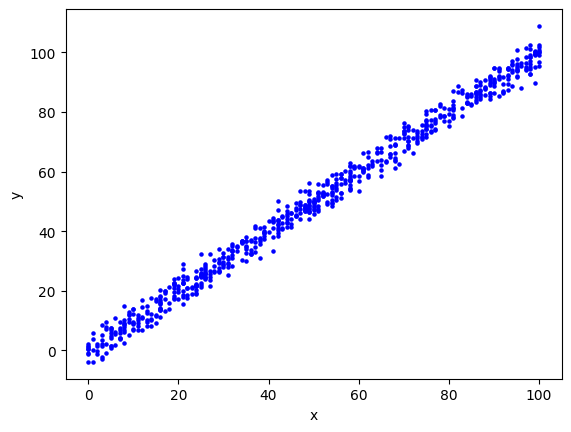

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

dataset = pd.read_csv('train.csv')

dataset.dropna(inplace=True)

x = dataset['x'].to_numpy()
y = dataset['y'].to_numpy()

plt.scatter(x,y,s = 5, color = 'blue')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

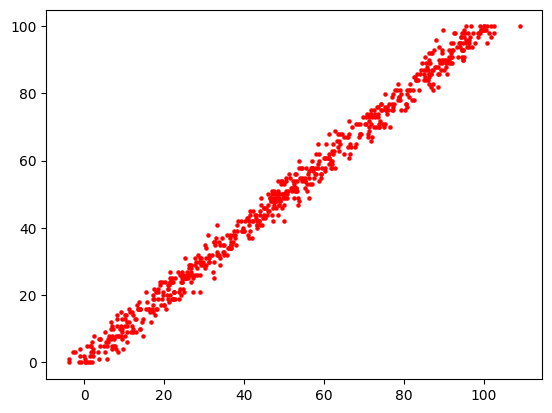

In [64]:
x = x.reshape(-1,1)

Model = LinearRegression()
Model.fit(x,y)

y_pred = Model.predict(x)

plt.scatter(y,y_pred,s = 5, color = 'red')
plt.show()